In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 
import pickle
import numpy as np
import pandas as pd
import tbapy

In [2]:
event_code = "2017flwp"

In [4]:
tba = tbapy.TBA('w4sdTrGh4f4ueC0pfm5ZceCZp3yM3I0SRsJLrn1oblRowvr3Zx2UbcXQpaWnZSpK')

teams = tba.event_teams(event_code)
i = 0
while i < len(teams):
    teams[i] = teams[i].json
    i+=1

teams = pd.DataFrame(teams)
teams = teams.drop('state_prov', axis=1)
teams = teams.drop('website', axis=1)
teams = teams.drop('name', axis=1)
teams = teams.drop('motto', axis=1)
teams = teams.drop('nickname', axis=1)
teams = teams.drop('postal_code', axis=1)
teams = teams.drop('location_name', axis=1)
teams = teams.drop('lng', axis=1)
teams = teams.drop('home_championship', axis=1)
teams = teams.drop('lat', axis=1)
teams = teams.drop('gmaps_url', axis=1)
teams = teams.drop('gmaps_place_id', axis=1)
teams = teams.drop('country', axis=1)
teams = teams.drop('city', axis=1)
teams = teams.drop('address', axis=1)
#print(teams)
team_info = []
for i in teams.key:
    team_info.append(tba.team(i).json)
alldata = pd.DataFrame(team_info)
data = alldata

data = data.drop('website', axis=1)
data = data.drop('state_prov', axis=1)
data = data.drop('postal_code', axis=1)
data = data.drop('nickname', axis=1)
data = data.drop('name', axis=1)
data = data.drop('motto', axis=1)
data = data.drop('location_name', axis=1)
data = data.drop('lng', axis=1)
data = data.drop('lat', axis=1)
data = data.drop('home_championship', axis=1)
data = data.drop('gmaps_url', axis=1)
data = data.drop('gmaps_place_id', axis=1)
data = data.drop('country', axis=1)
data = data.drop('city', axis=1)
data = data.drop('address', axis=1)

data = data.set_index('key')

opr = tba.event_oprs(event_code)
opr = opr.json
opr = pd.DataFrame(opr)


data = data.join(opr)

finals = tba.event_alliances(event_code)
final_picks = []
for i in finals:
    final_picks.append(i.picks)
final_picks = [item for sublist in final_picks for item in sublist]

data['final'] = data.index.isin(final_picks)

#print(data[data['final']==True].count())

#data = pickle.load( open( "final.p", "rb" ) )

team_events = []

for i in data.index:
    events = []
    tb_events = tba.team_events(i)
    for e in tb_events:
        events.append(e.json)
    team_events.append(events)

yearly_events = []
for i in team_events:
    events = []
    for p in i:
        if p['year'] == 2017 and (p['event_type'] == 0 or p['event_type'] == 1):
            events.append(p)
    yearly_events.append(events)
team_events = yearly_events

count = []
for i in team_events:
    count.append(len(i))

data['num_comps'] = count

#print(data)

data['rookie_year'] = 2017 - data['rookie_year']

In [5]:
data

,rookie_year,team_number,ccwms,dprs,oprs,final,num_comps
key,,,,,,,
frc125,19,125,-13.020199,76.833543,63.813345,True,4
frc1251,13,1251,10.754516,59.138732,69.893248,True,3
frc1523,12,1523,48.955095,48.207602,97.162697,True,2
frc1744,11,1744,75.158141,26.008837,101.166978,True,2
frc179,19,179,54.782985,52.025912,106.808897,True,2
frc21,19,21,-27.721199,70.623857,42.902658,False,2
frc2152,10,2152,-5.197201,71.630178,66.432977,True,2
frc233,18,233,62.943492,30.888559,93.832052,True,2
frc2383,9,2383,27.105497,43.263771,70.369268,True,3


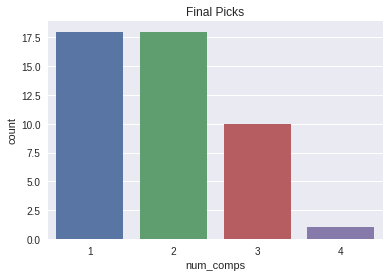

In [6]:
ax = plt.axes()
sns.countplot(x='num_comps', data=data);
ax.set_title('Final Picks')
plt.show()

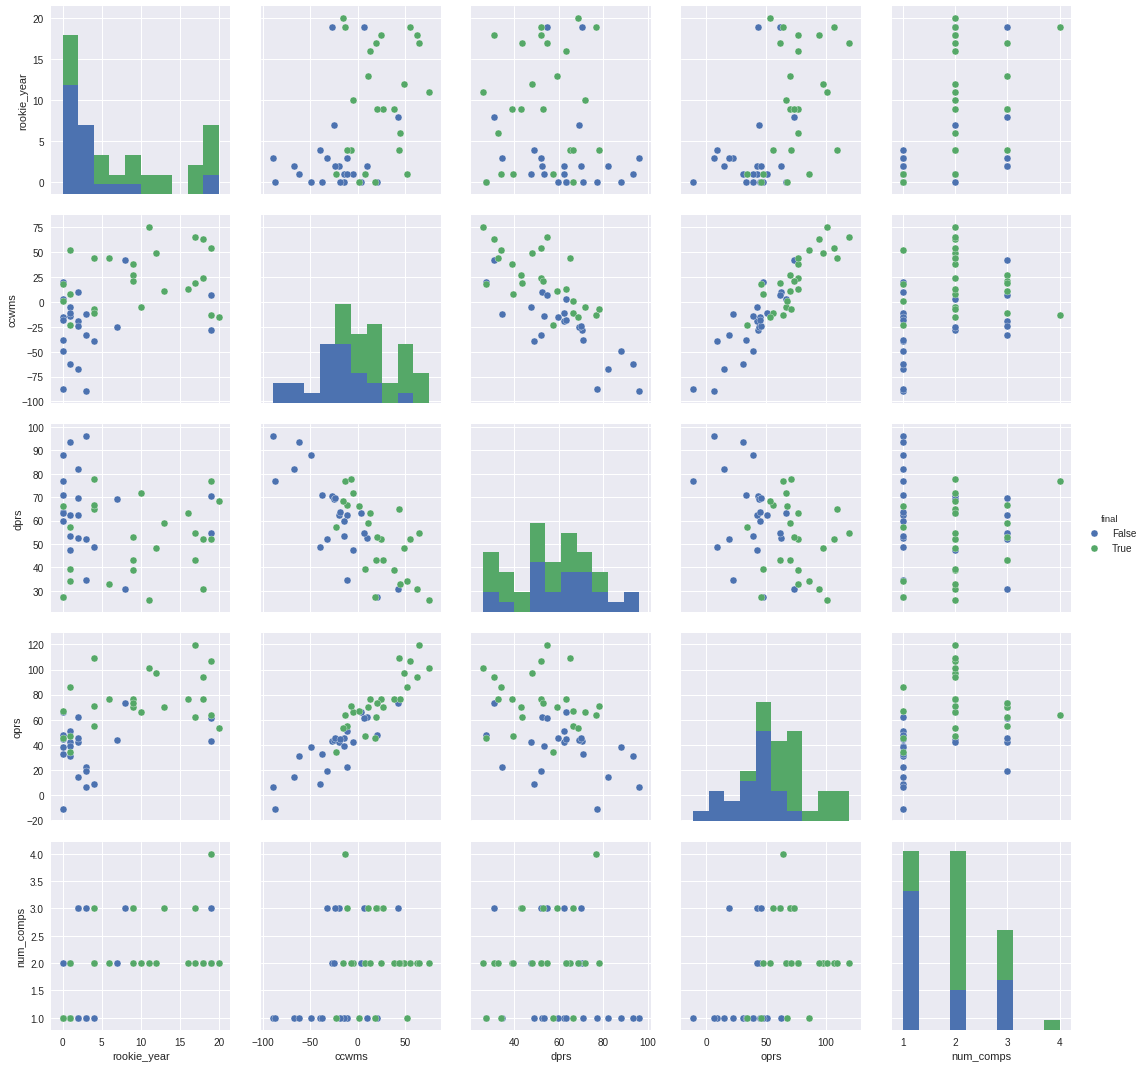

In [7]:
sns.pairplot(data, vars=['rookie_year', 'ccwms', 'dprs', 'oprs', 'num_comps'], hue='final', size=3)
plt.show()